# Занятие 4

## Введение

Всем привет! Здесь будет материал четвёртого занятия. 

Как вы уже знаете, в математической статистике существует задача проверки статистических гипотез: нулевая гипотеза проверяется против какой-либо альтернативы. Напомню, что в прошлый раз вы занимались проверкой двух выборок на однородность. На этом занятии мы будем проверять на однородность несколького выборок. Но сначала небольшое напоминание.

### Напоминание. Сравнение средних двух выборок. Криетрий Стьюдента.

Для сравнения средних двух выборок можно использовать критерий Стьюдента (или, как его ещё называют, $t$-тест).

Стоит отметить, что классический критерий Стьюдента использует предположение о том, что дисперсии равны.

Рассмотрим следующие гипотезы:
<br>$H_0:$ Выборки имеют равные средние,
<br>$H_1:$ Выборки имеют различные средние.

Пусть есть две независимые нормальные выборки объёма $n_1$ и $n_2$. В случае совпадения дисперсий статистика критерия имеет вид

$$
t = \frac{\overline X_1 - \overline X_2}{s_X \sqrt{\frac{1}{n_1}+\frac{1}{n_2}}} ~,~~s_X=\sqrt {\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}},
$$
где $s$ – несмещённая оценка дисперсии:
$$
s^2=\frac {\sum^n_{t=1}(X_t-\overline X)^2}{n-1}
$$

Отметим также, что эта статистика имеет распределение Стьюдента $t(n_1 + n_2 - 2)$.

## Часть 1. Сравнение дисперсий нескольких выборок.

В предположении нормальности выборок для проверки равенства дисперсий нескольких выборок можно использовать криетрий Бартлетта.

Пусть все $X_{ij} \sim \mathcal{N}(m_j, \sigma_j), \:(i = 1, \dots, n_j, j = 1, \dots, k)$ независимы, при этом параметры $m_j, \sigma_j$ неизвестны. Как мы знаем, несмещёнными оценками для параметров сдвига и масштаба являются:

$$
X_{\cdot j} = \dfrac{1}{n_j} \sum_{i = 1}^{n_j} X_{ij} \; \text{и} \; S_{j}^{2} = \dfrac{1}{n_j - 1} \sum_{i = 1}^{n_j}(X_{ij} - X_{\cdot j})^2.
$$

Положим $N = n_1 + \dots + n_k$. Проверяется гипотеза равенства всех дисперсий:
<br>$H_0:$ Все выборки имеют равные дисперсии,
<br>$H_1:$ Не все выборки имеют равные дисперсии.

Статистикой критерия Бартлетта является следующая функция

$$
B = \dfrac{\dfrac{1}{N} \sum_{j = 1}^{k} n_j S_j^2}{\sqrt[N]{\prod_{j = 1}^{k}(S_j^2)^{n_j}}}.
$$

Если нулевая гипотеза выполняется и все $n_j > 3$, то статистика

$$
B^* = \gamma^{-1} N \ln{B}, \text{где } \gamma = 1 + \dfrac{1}{3(k - 1) }\left[\left( \sum_{j = 1}^{k} \dfrac{1}{n_j} \right) - \dfrac{1}{N} \right]
$$

приближённо имеет $\chi_{k - 1}^2$ распределение.

Проверим критерий Бартлетта для следующего набора данных.

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
df = pd.read_excel("../Data/Chromium.xls")
df.head()

,Пласт1,Пласт2,Пласт3,Пласт4,Пласт5,Пласт6,Пласт7,Пласт8
0,1.42,1.42,1.42,1.38,1.36,1.37,1.38,1.32
1,1.42,1.39,1.38,1.41,1.37,1.34,1.37,1.33
2,1.41,1.38,1.41,1.41,1.37,1.38,1.36,1.34
3,1.44,1.38,1.41,1.42,1.39,1.34,1.37,1.32


**Легенда к заданию.**

Исследовалось содержание хрома в стальном пруте, разрезанном на пластины. Каждую пластину измеряли несколько раз.
* **Пласт** – номер пластины,
* **Cr** – содержание хрома (%).

In [2]:
display(df)

,Пласт1,Пласт2,Пласт3,Пласт4,Пласт5,Пласт6,Пласт7,Пласт8
0,1.42,1.42,1.42,1.38,1.36,1.37,1.38,1.32
1,1.42,1.39,1.38,1.41,1.37,1.34,1.37,1.33
2,1.41,1.38,1.41,1.41,1.37,1.38,1.36,1.34
3,1.44,1.38,1.41,1.42,1.39,1.34,1.37,1.32


Как обычно, давайте вызовем метод `info()`.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Пласт1  4 non-null      float64
 1   Пласт2  4 non-null      float64
 2   Пласт3  4 non-null      float64
 3   Пласт4  4 non-null      float64
 4   Пласт5  4 non-null      float64
 5   Пласт6  4 non-null      float64
 6   Пласт7  4 non-null      float64
 7   Пласт8  4 non-null      float64
dtypes: float64(8)
memory usage: 384.0 bytes


В этот раз я снова заранее подготовил данные.

Также давайте вызовем метод `describe()`.

In [4]:
df.describe()

,Пласт1,Пласт2,Пласт3,Пласт4,Пласт5,Пласт6,Пласт7,Пласт8
count,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,1.422500,1.39250,1.405000,1.405000,1.372500,1.357500,1.370000,1.327500
std,0.012583,0.01893,0.017321,0.017321,0.012583,0.020616,0.008165,0.009574
min,1.410000,1.38000,1.380000,1.380000,1.360000,1.340000,1.360000,1.320000
25%,1.417500,1.38000,1.402500,1.402500,1.367500,1.340000,1.367500,1.320000
50%,1.420000,1.38500,1.410000,1.410000,1.370000,1.355000,1.370000,1.325000
75%,1.425000,1.39750,1.412500,1.412500,1.375000,1.372500,1.372500,1.332500
max,1.440000,1.42000,1.420000,1.420000,1.390000,1.380000,1.380000,1.340000


Как мы видим из таблицы наших исходных данных выше, у нас есть 8 пластин – выборок, дисперсии которых и нужно проверить. Давайте придумаем какую-нибудь более изящную функцию для создания выборок, чем просто перечисление столбцов таблицы в качестве аргумента функции.

Сначала заведём список, в который положим названия всех колонок из таблицы. 

In [5]:
names = list(df.columns)
print(names)

['Пласт1', 'Пласт2', 'Пласт3', 'Пласт4', 'Пласт5', 'Пласт6', 'Пласт7', 'Пласт8']


Будем использовать оператор `*` для автоматического перебора по всем таблицы – распаковки в аргументы функции. Подробнее можно прочитать, например, [тут](https://tproger.ru/translations/asterisks-in-python-what-they-are-and-how-to-use-them/).

In [7]:
f, p = stats.bartlett(*[df[col] for col in names])
print("F:", f)
print("P-value:", p)

F: 3.7215025069362024
P-value: 0.8112377426908652


Мы получили большое $P$-значение. Значит, достаточно уверенно мы можем принять гипотезу о равенстве дисперсий.

## Часть 2. Сравнение средних нескольких выборок.

Классический критерий Стьюдента существенно использует предположение о нормальности выборок, а также о равенстве дисперсий. Сохраним это требование на случай многих выборок. Тем более, равенство диперсий мы уже проверили.

Давайте рассмотрим задачу проверки средних нескольких выборок. Сформулируем следующие гипотезы.

$H_0:$ Все выборки имеют равные средние,
<br>$H_1:$ Не все выборки имеют равные средние.

Для выполнения однофакторного дисперсионного анализа будем использовать метод `f_oneway()` из библиотеки `scipy.stats`.

In [8]:
f, p = stats.f_oneway(*[df[col] for col in names])
print("F:", f)
print("P-value:", p)

F: 16.26457399103135
P-value: 1.0530803541299794e-07


Что мы видим? Значение статистики большое. $P$-значение при этом очень маленькое. Значит, мы достаточно уверенно можем отклонить гипотезу о равенстве средних.

## Часть 3. Замечание про "длинный" формат таблицы и ящики с усами.

Наша исходная таблица представлена в "широком" формате. Такой формат более удобно читать человеку, но для компьютера лучше годится "длинный" формат. Выполним необходимые преобразования, наблюдая разницу.

In [9]:
display(df)

,Пласт1,Пласт2,Пласт3,Пласт4,Пласт5,Пласт6,Пласт7,Пласт8
0,1.42,1.42,1.42,1.38,1.36,1.37,1.38,1.32
1,1.42,1.39,1.38,1.41,1.37,1.34,1.37,1.33
2,1.41,1.38,1.41,1.41,1.37,1.38,1.36,1.34
3,1.44,1.38,1.41,1.42,1.39,1.34,1.37,1.32


In [10]:
dfMelt = pd.melt(df, var_name = 'plast', value_name = 'value' )

In [11]:
print(dfMelt)

     plast  value
0   Пласт1   1.42
1   Пласт1   1.42
2   Пласт1   1.41
3   Пласт1   1.44
4   Пласт2   1.42
5   Пласт2   1.39
6   Пласт2   1.38
7   Пласт2   1.38
8   Пласт3   1.42
9   Пласт3   1.38
10  Пласт3   1.41
11  Пласт3   1.41
12  Пласт4   1.38
13  Пласт4   1.41
14  Пласт4   1.41
15  Пласт4   1.42
16  Пласт5   1.36
17  Пласт5   1.37
18  Пласт5   1.37
19  Пласт5   1.39
20  Пласт6   1.37
21  Пласт6   1.34
22  Пласт6   1.38
23  Пласт6   1.34
24  Пласт7   1.38
25  Пласт7   1.37
26  Пласт7   1.36
27  Пласт7   1.37
28  Пласт8   1.32
29  Пласт8   1.33
30  Пласт8   1.34
31  Пласт8   1.32


<AxesSubplot:xlabel='plast', ylabel='value'>

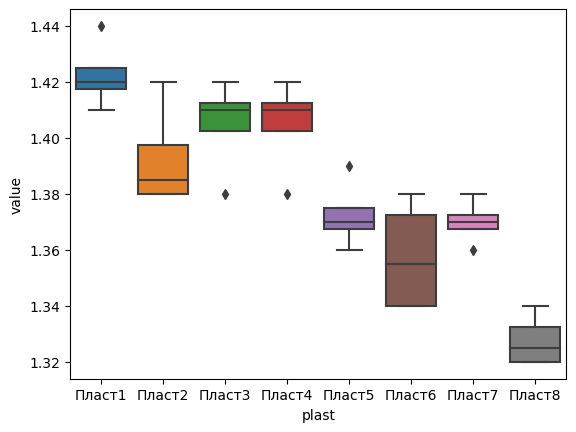

In [30]:
sns.boxplot(x = 'plast', y = 'value', data=dfMelt)

Как следует понимать эти картинки?
* Если ящик короткий, а усы – длинные, то это означает, что данные плотно сгруппированы вокруг медианы, и дисперсия маленькая. 
* Если квадрат длинный, а усы – короткие, это указывает на то, что данные разбросаны, и дисперсия большая.

## Часть 4. Поиск зависимости дисперсии от среднего.

Для начала давайте примением критерий Бартлетта для проверки дисперсий следующего набора данных.

In [13]:
dfSamples = pd.read_excel('../Data/Samples.xls')

In [14]:
dfSamples.head()

,Обр1,Обр2,Обр3,Обр4,Обр5
0,0.085,0.180,0.487,0.683,0.970
1,0.090,0.183,0.489,0.684,0.970
2,0.091,0.187,0.490,0.688,0.972
3,0.093,0.188,0.490,0.690,0.982
4,0.095,0.188,0.494,0.690,0.986


In [15]:
dfSamples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Обр1    20 non-null     float64
 1   Обр2    20 non-null     float64
 2   Обр3    20 non-null     float64
 3   Обр4    20 non-null     float64
 4   Обр5    20 non-null     float64
dtypes: float64(5)
memory usage: 928.0 bytes


In [16]:
dfSamples.describe()

,Обр1,Обр2,Обр3,Обр4,Обр5
count,20.000000,20.000000,20.00000,20.000000,20.000000
mean,0.100500,0.194900,0.50210,0.703000,0.999850
std,0.007944,0.009049,0.01167,0.013131,0.016903
min,0.085000,0.180000,0.48700,0.683000,0.970000
25%,0.096500,0.189500,0.49400,0.693750,0.989750
50%,0.101000,0.192500,0.49950,0.703000,1.001000
75%,0.104250,0.201000,0.50550,0.709500,1.015250
max,0.120000,0.216000,0.52800,0.736000,1.021000


In [18]:
names = list(dfSamples.columns)
f, p = stats.bartlett(*[dfSamples[col] for col in names])
print("F:", f)
print("P-value:", p)

F: 13.255157005107282
P-value: 0.010094060746970808


Вновь получаем достаточно маленькое $P$-значение. Следовательно, нулевую гипотезу о равенстве дисперсий можно отклонять. 

Но от чего же зависят значения дисперсий? Самая наивная идея, которая только может здесь возникнуть состоит в том, что значения дисперсий зависят от значений средних. 

При этом тут есть маленький нюанс, связанный с размерностями: размерности диперсии и среднего не равны. Поэтому вместо дисперсии давайте брать среднеквадратичное отклонение.

Проверим эту идею и построим график зависимости отклонения от среднего.

Зададим какой-нибудь пустой список, который будет содержать пары точек на плоскости для построения графика. Этими парами будут являться `std` и `mean`. 

In [19]:
dots = []
for column in dfSamples.columns:
    dots.append([dfSamples[column].std(), dfSamples[column].mean()])
print(dots)

[[0.007943882121349404, 0.1005], [0.009048989475422976, 0.1949], [0.011670475568716138, 0.5021], [0.013130919717657967, 0.7030000000000001], [0.016903051733185227, 0.99985]]


Осталось только построить график! Снова используем оператор `*`, а также метод `zip()`.

Text(0, 0.5, 'mean')

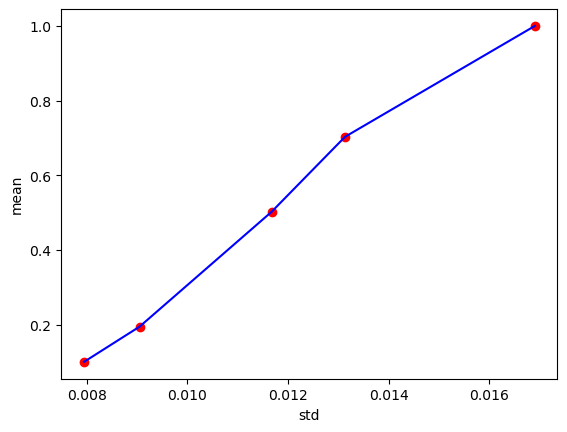

In [29]:
plt.scatter(*zip(*dots), color = 'red')
plt.plot(*zip(*dots), color = 'blue')
plt.xlabel('std')
plt.ylabel('mean')

**P.S.** Посмотрите, как работает `zip()`.

> Контрольный вопрос: чем `zip(dots)` отличается от `zip(*dots)`?

## Задача.

Выполнить своё индивидуальное задание.